## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [4]:
!pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.6 MB/s eta 0:00:00


In [5]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.18.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [6]:
!!pip uninstall nlp
!!pip install datasets --upgrade


['Requirement already satisfied: datasets in /usr/local/lib/python3.11/dist-packages (2.14.4)',
 'Collecting datasets',
 '  Downloading datasets-3.6.0-py3-none-any.whl.metadata (19 kB)',
 'Requirement already satisfied: filelock in /usr/local/lib/python3.11/dist-packages (from datasets) (3.18.0)',
 'Requirement already satisfied: numpy>=1.17 in /usr/local/lib/python3.11/dist-packages (from datasets) (2.0.2)',
 'Requirement already satisfied: pyarrow>=15.0.0 in /usr/local/lib/python3.11/dist-packages (from datasets) (18.1.0)',
 'Requirement already satisfied: dill<0.3.9,>=0.3.0 in /usr/local/lib/python3.11/dist-packages (from datasets) (0.3.7)',
 'Requirement already satisfied: pandas in /usr/local/lib/python3.11/dist-packages (from datasets) (2.2.2)',
 'Requirement already satisfied: requests>=2.32.2 in /usr/local/lib/python3.11/dist-packages (from datasets) (2.32.3)',
 'Requirement already satisfied: tqdm>=4.66.3 in /usr/local/lib/python3.11/dist-packages (from datasets) (4.67.1)',
 '

In [7]:
from datasets import load_dataset

dataset = load_dataset("emotion")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [8]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [9]:
train = dataset['train']
test = dataset['test']
val = dataset['validation']

In [10]:
def get_tweet(data):
  tweets= [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [11]:
tweets, labels = get_tweet(train)
tweets[10], labels[10]

('i feel like i have to make the suffering i m seeing mean something', 0)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [13]:
tokenizer= Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

#Output of tokenizer on - tweets[0]

In [14]:
tokenizer.texts_to_sequences(tweets[0])

[[2],
 [],
 [669],
 [2],
 [669],
 [1726],
 [43],
 [],
 [1997],
 [1550],
 [1550],
 [8884],
 [],
 [6051],
 [966],
 [93],
 [2],
 [8884],
 [2],
 [7],
 [43],
 [1550],
 [669]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

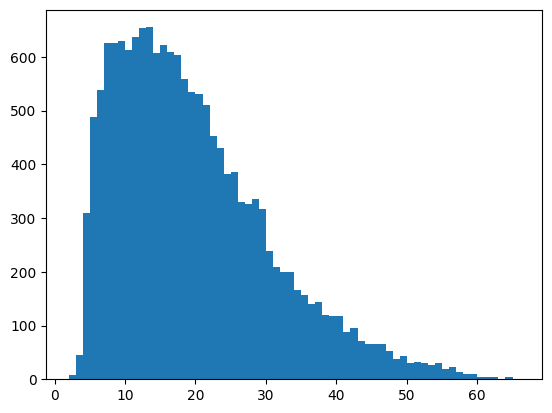

In [15]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [16]:
maxlen= 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
def get_sequences(tokenizer, tweets):
  sequences= tokenizer.texts_to_sequences(tweets)
  padded= pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
  return padded

In [35]:
padded_train_seq= get_sequences(tokenizer, tweets)
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [63]:
print(padded_train_seq.shape)

(16000, 50)


## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [19]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


<function matplotlib.pyplot.show(close=None, block=None)>

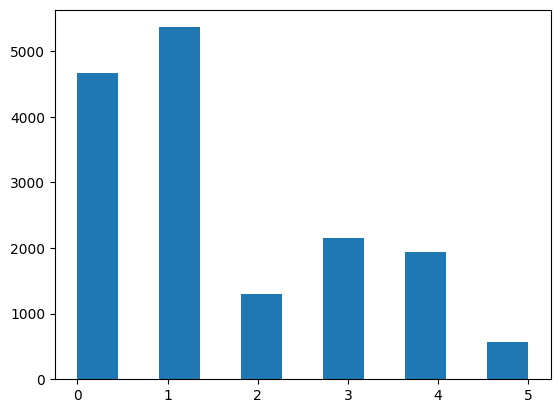

In [20]:
plt.hist(labels, bins=11)
plt.show

In [21]:
classes_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_classes= dict((v,k) for k,v in classes_to_index.items())


In [22]:
classes_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [23]:
index_to_classes

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [68]:
names_to_ids = lambda label_list: np.array([classes_to_index.get(x) for x in label_list])


In [69]:
train_labels = names_to_ids (labels)
print(train_labels[4])

3


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [71]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [72]:
val_tweets, val_labels = get_tweet(val)
val_seq= get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [73]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 np.int64(0))

In [74]:
print(len(padded_train_seq), len(train_labels))
print(len(val_seq), len(val_labels))


16000 16000
2000 2000


In [75]:
h = model.fit (
    padded_train_seq, train_labels,
    validation_data=(val_seq, val_labels),
    epochs=20,
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3649 - loss: 1.5420 - val_accuracy: 0.6815 - val_loss: 0.8429
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7590 - loss: 0.6393 - val_accuracy: 0.7690 - val_loss: 0.6316
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8729 - loss: 0.3650 - val_accuracy: 0.8450 - val_loss: 0.4725
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9305 - loss: 0.2136 - val_accuracy: 0.8700 - val_loss: 0.4188
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9540 - loss: 0.1419 - val_accuracy: 0.8730 - val_loss: 0.4122
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9708 - loss: 0.0961 - val_accuracy: 0.8780 - val_loss: 0.4031
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9708 - loss: 0.0948 - val_accuracy: 0.8775 - val_loss: 0.4100
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9684 - loss: 0.1035 - va

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

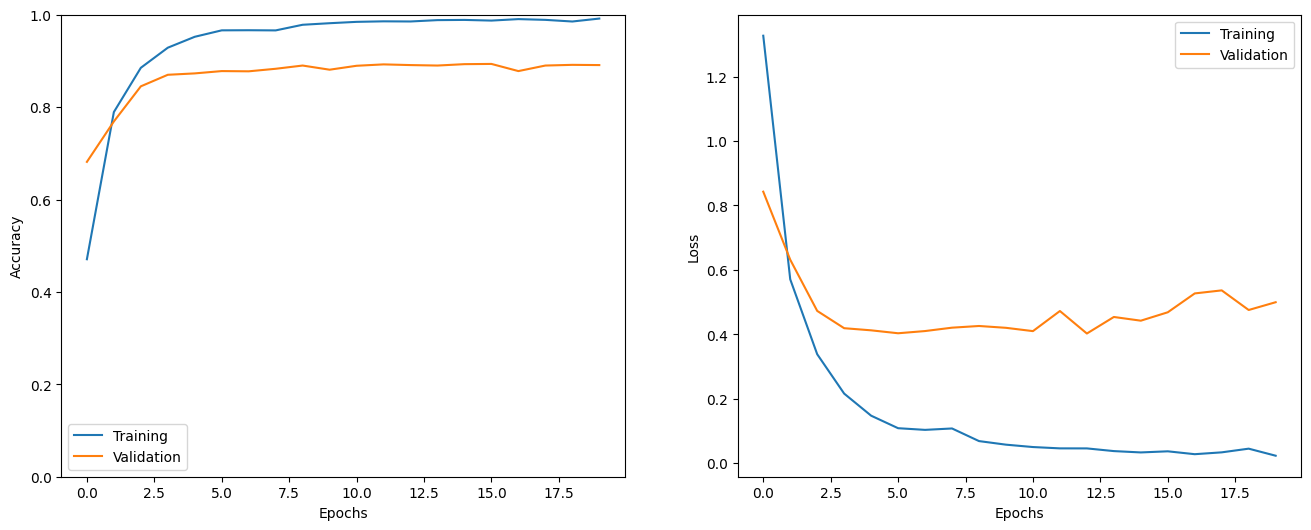

In [76]:
show_history(h)

In [77]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [78]:
_ = model.evaluate(test_seq, test_labels)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8901 - loss: 0.4877


In [83]:
i = random.randint(0, len(test_labels)-1)
print('Sentence:', test_tweets[i])
print('Emotion:', index_to_classes[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class= index_to_classes[np.argmax(p).astype('uint8')]
print('Predicted Emotion:', pred_class)



Sentence: i stand in front of mansoor s works i feel obviously that the artistic intention is not to raise the already raised questions of structural linguistics and the deconstructionist clamours that followed it
Emotion: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Emotion: 1


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


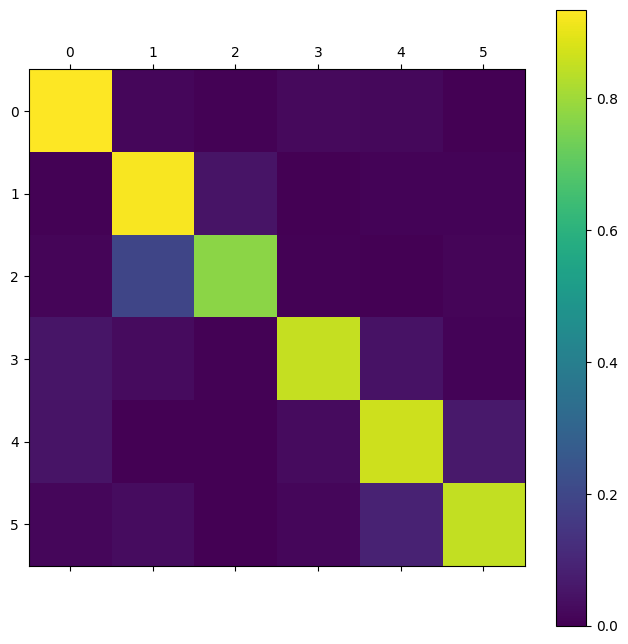

In [88]:
preds = np.argmax(model.predict(test_seq), axis=1)
show_confusion_matrix(test_labels, preds, list(classes))